<a href="https://colab.research.google.com/github/ryoheiyoshida/IntroGit/blob/master/poker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

インポート

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files

uploaded2 = files.upload()

Saving train_correct.csv to train_correct.csv


In [ ]:
from google.colab import files

uploaded3 = files.upload()

Saving test.csv to test.csv


確認

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("train_correct.csv").values.tolist()
data2 = pd.read_csv("train.csv").values.tolist()
data3 = pd.read_csv("test.csv").values.tolist()
a = np.array(data)
b =np.array(data2)
c = np.array(data3)

print(a.transpose(1,0))
print(b)
print(b[:,0])
print(c)

[[0 0 2 ... 0 0 1]]
[[ 4  9  2 ...  7  2  8]
 [ 1  4  3 ... 11  2  7]
 [ 1 11  4 ... 11  2  1]
 ...
 [ 1  8  4 ...  2  2 13]
 [ 4 12  3 ...  7  4  6]
 [ 1  1  1 ...  2  4  2]]
[4 1 1 ... 1 4 1]
[[      1       1      10 ...       8       1       1]
 [      2       2      13 ...       6       1       4]
 [      3       1       3 ...       1       2       4]
 ...
 [ 999998       1       7 ...       9       2       5]
 [ 999999       1       1 ...       5       3      10]
 [1000000       2       2 ...       4       3      11]]


訓練データの学習

[[ 4  9  2 ...  7  2  8]
 [ 1  4  3 ... 11  2  7]
 [ 1 11  4 ... 11  2  1]
 ...
 [ 1  8  4 ...  2  2 13]
 [ 4 12  3 ...  7  4  6]
 [ 1  1  1 ...  2  4  2]]
[[ 1.  2.  7.  8.  9.]
 [ 4.  6.  7. 11. 12.]
 [ 1.  1.  7. 11. 11.]
 ...
 [ 2.  5.  8. 11. 13.]
 [ 1.  5.  6.  7. 12.]
 [ 1.  2.  2.  3.  7.]]
[[-0.83287458 -1.15479617  0.01674404 -0.48688304 -1.24121818]
 [ 0.76363505  0.53712118  0.01674404  0.77624183  0.35077813]
 [-0.83287458 -1.57777551  0.01674404  0.77624183 -0.17988731]
 ...
 [-0.30070471  0.11414185  0.41747942  0.77624183  0.88144356]
 [-0.83287458  0.11414185 -0.38399134 -0.90792466  0.35077813]
 [-0.83287458 -1.15479617 -1.98693285 -2.59209116 -2.30254904]]
Epoch:0/2000 Error_train:2.2847056705039837
Epoch:100/2000 Error_train:0.0025718149451019155
Epoch:200/2000 Error_train:0.0016613831554849136
Epoch:300/2000 Error_train:0.0010268874456428913
Epoch:400/2000 Error_train:0.0007525695421552086
Epoch:500/2000 Error_train:0.0006162354612293644
Epoch:600/2000 Error_train:

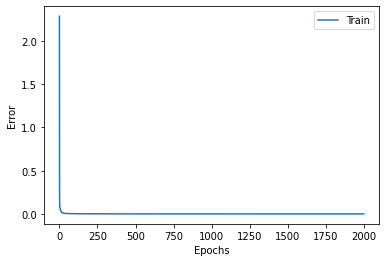

Accuracy Train: 100.0%
[[9.99999991e-01 1.48522910e-09 2.98371103e-17 ... 5.21795844e-28
  1.75232232e-13 3.30963455e-21]
 [9.99999965e-01 7.52370349e-09 2.17764614e-16 ... 1.26389558e-26
  9.94701786e-13 3.31392747e-20]
 [2.41194674e-22 8.71084071e-08 9.99999837e-01 ... 3.00001991e-12
  6.28678634e-12 6.01605305e-11]
 ...
 [9.99999995e-01 3.52451641e-10 3.46912252e-18 ... 7.34585201e-29
  6.81377322e-14 5.75955750e-22]
 [9.99999976e-01 4.77476916e-09 6.92299608e-17 ... 7.08739747e-27
  5.90086826e-13 1.30230364e-20]
 [1.11782821e-12 9.99997224e-01 3.41615215e-08 ... 1.58244159e-13
  2.33112239e-08 4.17913888e-14]]
学習結果
0 : 12493.0
1 : 10599.0
2 : 1206.0
3 : 513.0
4 : 93.0
5 : 54.0
6 : 36.0
7 : 6.0
8 : 5.0
9 : 5.0
正解
0 : 12493.0
1 : 10599.0
2 : 1206.0
3 : 513.0
4 : 93.0
5 : 54.0
6 : 36.0
7 : 6.0
8 : 5.0
9 : 5.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

df = pd.read_csv('train.csv')  # S1~S5=1~4（スート）  C1~C5=1~13（数字）　ポーカーのハンドの訓練データ
df2 = pd.read_csv('train_correct.csv')#0~9　正解のデータ　ex)0…ノーペア　１…ワンペア

#arrayに変換
input_data = np.array(df)
correct = np.array(df2)
# print(input_data)
# print(correct)

n_data = len(correct)#25010列

train_data = np.zeros((n_data,5))#新しく配列を作る
count=0

#データを整理する
for i in range(n_data):
  if input_data[i,0] == input_data[i,2] == input_data[i,4] == input_data[i,6] == input_data[i,8]:#スートがすべて同じとき
    k = -1 
  else:
    k = 1 
  
  #数字を順番に入れていく
  for j in range(5):
    train_data[i,j] = input_data[i,j*2+1]*k # C1~C5=1~13（数字）

  train_data.sort() #ソート
  count+=1
  #print(count)
print(input_data) #元のデータ
print(train_data) #整理したデータ

# 標準化(正規化よりも正解率がよかった)
ave_input = np.average(train_data, axis=0)
std_input = np.std(train_data, axis=0)
train_data = (train_data - ave_input) / std_input

# 正規化
# train_max =np.max(train_data, axis=0)
# train_min =np.min(train_data, axis=0)
# train_data = (train_data - train_min) / (train_max - train_min)

# print(ave_input)
# print(std_input)

print(train_data) #整理したデータを標準化したデータ

correct_data = np.zeros((n_data,10)) #25010列×10行
for i in range(n_data):
  correct_data[i, correct[i]] = 1.0 #正解の場所に１を入れていく


index = np.arange(n_data)

input_train = train_data[index, :]     #訓練　入力
correct_train = correct_data[index, :] #訓練　正解

n_train = input_train.shape[0] #訓練データのサンプル数

n_in = 5    #入力層のニューロン数
n_mid = 100 #中間層のニューロン数
n_out = 10  #出力層のニューロン数

wd_width = 0.1  #重みとバイアスの広がり具合
eta = 0.01      #学習係数
epoch = 2000    #エポック
batch_size = 8  #バッチサイズ
interval = 100  #経過の表示間隔

#各層の継承元　AdaGrad
class BaseLayer:
  def __init__(self, n_upper, n):
    self.w =wd_width * np.random.randn(n_upper, n) #重み
    self.b =wd_width * np.random.randn(n)          #バイアス

    self.h_w = np.zeros(( n_upper, n)) + 1e-8
    self.h_b = np.zeros(n) + 1e-8

  def update(self, eta):
    self.h_w += self.grad_w * self.grad_w
    self.w -= eta /np.sqrt(self.h_w) * self.grad_w
    
    self.h_b += self.grad_b * self.grad_b
    self.b -= eta / np.sqrt(self.h_b) * self.grad_b

#中間層
class MiddleLayer(BaseLayer):
  def forward(self, x):
    self.x =x
    self.u = np.dot(x, self.w) + self.b
    self.y = np.where(self.u <= 0, 0.01*self.u, self.u) #Leaky ReLU

  def backward(self,grad_y):
    delta = grad_y * np.where(self.u <= 0, 0.01, 1) #Leaky ReLUの微分

    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)

    self.grad_x = np.dot(delta, self.w.T)

#ドロップアウト
class Dropout: 
  def __init__(self, dropout_ratio):
    self.dropout_ratio = dropout_ratio

  def forward(self, x, is_train): #is_train:学習時はTrue
    if is_train:
      rand = np.random.rand(*x.shape)
      self.dropout = np.where(rand > self.dropout_ratio, 1, 0)
      self.y = x * self.dropout
    else:
      self.y = (1-self.dropout_ratio)*x

  def backward(self, grad_y):
    self.grad_x = grad_y * self.dropout

#出力層
class OutputLayer(BaseLayer):
  def forward(self, x):
    self.x = x
    u = np.dot(x, self.w) + self.b #ソフトマックス関数

    self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)

  def backward(self, t):
    delta = self.y - t

    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)

    self.grad_x = np.dot(delta, self.w.T)

#各層の初期化
middle_layer_1 = MiddleLayer(n_in, n_mid)
dropout_1 = Dropout(0.25)
middle_layer_2 = MiddleLayer(n_mid, n_mid)
dropout_2 = Dropout(0.25)
middle_layer_3 = MiddleLayer(n_mid,n_mid)
dropout_3 = Dropout(0.25)
middle_layer_4 = MiddleLayer(n_mid,n_mid)
dropout_4 = Dropout(0.25)
output_layer = OutputLayer(n_mid, n_out)

#順伝播
def forward_propagation(x,is_train):
  middle_layer_1.forward(x)
  dropout_1.forward(middle_layer_1.y, is_train)
  middle_layer_2.forward(dropout_1.y)
  dropout_2.forward(middle_layer_2.y, is_train)
  middle_layer_3.forward(dropout_2.y)
  dropout_3.forward(middle_layer_3.y, is_train)
  middle_layer_4.forward(dropout_3.y)
  dropout_4.forward(middle_layer_4.y, is_train)
  output_layer.forward(dropout_4.y)

#逆伝播
def backpropagation(t):
  output_layer.backward(t)
  dropout_4.backward(output_layer.grad_x)
  middle_layer_4.backward(dropout_4.grad_x)
  dropout_3.backward(middle_layer_4.grad_x)
  middle_layer_3.backward(dropout_3.grad_x)
  dropout_2.backward(middle_layer_3.grad_x)
  middle_layer_2.backward(dropout_2.grad_x)
  dropout_1.backward(middle_layer_2.grad_x)
  middle_layer_1.backward(dropout_1.grad_x)

#重みとバイアスの更新
def uppdate_wb():
  middle_layer_1.update(eta)
  middle_layer_2.update(eta)
  middle_layer_3.update(eta)
  middle_layer_4.update(eta)
  output_layer.update(eta)

#交差エントロピー誤差を計算
def get_error(t, batch_size):
  return -np.sum(t * np.log(output_layer.y + 1e-7)) / batch_size

#誤差の記録用
train_error_x = []
train_error_y = []

#学習と経過の記録
n_batch = n_train // batch_size
for i in range(epoch):

  #誤差の計算
  forward_propagation(input_train, False)
  error_train = get_error(correct_train, n_train)

  #誤差の記録
  train_error_x.append(i)
  train_error_y.append(error_train)

  #経過の表示
  if i%interval == 0:
    print("Epoch:" + str(i) + "/" + str(epoch), "Error_train:" + str(error_train))

  #学習
  index_random = np.arange(n_train)
  np.random.shuffle(index_random)
  for j in range(n_batch):

    #ミニバッチを取り出す
    mb_index = index_random[j * batch_size : (j+1)*batch_size]
    x = input_train[mb_index, :]
    t = correct_train[mb_index, :]
    
    #順伝播と逆伝播
    forward_propagation(x,True)
    backpropagation(t)

    #重みとバイアスの更新
    uppdate_wb()

#表示
plt.plot(train_error_x, train_error_y, label="Train")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")

plt.show()

#正解率の測定
forward_propagation(input_train, False)
count_train = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_train, axis=1))

print("Accuracy Train:", str(count_train/n_train*100) + "%")

#判定
forward_propagation(train_data, False)
print(output_layer.y)

#学習結果（それぞれいくつあったか）
result_count = np.zeros(10)
#正解
correct_count = np.zeros(10)
for i in range(n_data):
  r_max = np.argmax(output_layer.y[i,:])
  result_count[r_max] += 1
  correct_count[correct[i]] += 1

print("学習結果")
for i in range(len(result_count)):
  print(i , ":" , result_count[i])
print("正解")
for i in range(len(correct_count)):
  print(i , ":" , correct_count[i])

テストデータでの結果

In [ ]:
df3 = pd.read_csv('test.csv')

test_data = np.array(df3)
all_data = len(test_data)
print(df3)
print(test_data)

tsort_data = np.zeros((all_data,5))
count = 0
for i in range(all_data):
  if test_data[i,1] == test_data[i,3] == test_data[i,5] == test_data[i,7] == test_data[i,9]:
    k = -1
  else:
    k = 1
  
  for j in range(5):
    tsort_data[i,j] = test_data[i,(j+1)*2]*k

  tsort_data.sort()
  count+=1

  if count%1000 == 0:
    print(count)
  
#ソートの経過の表示
print(tsort_data)

ave_input = np.average(tsort_data, axis=0)
std_input = np.std(tsort_data, axis=0)
tsort_data = (tsort_data - ave_input) / std_input

forward_propagation(tsort_data, False)
print(output_layer.y)

print("テスト結果")
result_count = np.zeros(10)
for i in range(all_data):
  r_max = np.argmax(output_layer.y[i,:])
  result_count[r_max] += 1

for i in range(len(result_count)):
  print(i , ":" , result_count[i])

#正解率の計算
correct_test_data = np.array([501209, 422498, 47622, 21121, 3885, 1996, 1424, 230, 12, 3])#kaggleでほかの人がやっていたデータから引用
#正解
print("正解")
for i in range(len(correct_test_data)):
  print(i, ":", correct_test_data[i])
sum = 0
for i in range(len(correct_test_data)):
  if result_count[i] >= correct_test_data[i]:
    sum += result_count[i] - correct_test_data[i]
  else:
    sum += correct_test_data[i] - result_count[i]

result = ((all_data - sum)/all_data) * 100
print("正解率", result, "%")

             id  S1  C1  S2  C2  S3  C3  S4  C4  S5  C5
0             1   1  10   2   2   3   3   3   8   1   1
1             2   2  13   3   5   3   7   4   6   1   4
2             3   1   3   1  11   2   8   2   1   2   4
3             4   1   6   3   3   4   7   1   8   3  11
4             5   2  10   3   4   1   6   2  12   2   6
...         ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
999995   999996   2   8   3   4   1  13   3   8   2   5
999996   999997   2   8   2   7   4  11   4   8   3   6
999997   999998   1   7   1   8   1   5   2   9   2   5
999998   999999   1   1   2   7   2  13   2   5   3  10
999999  1000000   2   2   3   3   1   3   4   4   3  11

[1000000 rows x 11 columns]
[[      1       1      10 ...       8       1       1]
 [      2       2      13 ...       6       1       4]
 [      3       1       3 ...       1       2       4]
 ...
 [ 999998       1       7 ...       9       2       5]
 [ 999999       1       1 ...       5       3      10]
 [1000000       2  